# Linear Exercise

뉴욕에 위치한 한 이커머스 회사가 있습니다. 이 회사는 온라인에서 옷을 판매하면서 오프라인 스토어에서(in-store) 스타일링이나 옷에 관한 조언을 하는 세션을 열기도 합니다.  
고객들은 스토어에 방문해서 스타일리스트와의 세션이나 미팅을 갖게 되고 집으로 돌아가서 모바일앱 또는 웹사이트에서 원하는 옷을 주문하는 구조입니다.  

이 회사는 모바일앱 또는 웹사이트에 집중해야 할지를 데이터를 기반으로 결정하려고 합니다.

아래 절차를 따라 커스터머 데이터를 분석하세요.

## Imports
**pandas, numpy, matplotlib, sklearn 등 필요할 때마다 라이브러리 추가**

In [4]:
# CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

회사에서 제공한 CSV 파일에는 이메일, 주소, 아바타 색깔(Avatar) 등의 고객정보와 함께 아래와 같은 칼럼의 숫자 데이터들이 포함되어있습니다.

* Avg. Session Length: 평균 in-store 스타일링 세션 시간
* Time on App: 앱에서 소비한 시간(분)
* Time on Website: 웹사이트에서 소비한 시간(분)
* Length of Membership: 회원가입 기간 (년)
* Yearly Amount Spent : 회원의 연간 매출 (달러) 

**EcommerceCustomers.csv 파일을 읽고 df 라는 이름의 DataFrame 을 만드세요.**

In [2]:
# CODE HERE
df = pd.read_csv('EcommerceCustomers.csv')

In [ ]:
# 출력 결과값 없음

**head(), info() 함수를 사용하여 데이터를 살펴봅니다.**

In [3]:
# CODE HERE
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Training and Testing Data

**customers DataFrame 에서 숫자로된 컬럼들만 셀렉트해서 변수 X 에 저장하고, "Yearly Amount Spent" 칼럼은 변수 y 에 저장하세요**

In [15]:
# 컬럼명 슬라이싱
df.columns[3:-1]
# select_dtypes
df.select_dtypes(float)
# 리스트 컴프리헨션
X = df[[col_nm for col_nm in df.columns if df[col_nm].dtype == float]]
y = X.pop('Yearly Amount Spent')

In [ ]:
# 실행결과없음

**sklearn 의 model_selection.train_test_split 를 사용해서 training 데이터와 testing 데이터로 7:3 으로분리하세요.random_state=42를 적용하여 동일한 결과값을 갖도록 설정하세요.**

In [18]:
# CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 실행결과없음

## Training the Model

**sklearn.linear_model 의 LinearRegression 을 import**

In [19]:
# CODE HERE
from sklearn.linear_model import LinearRegression

In [35]:
# 실행결과없음

**LinearRegression() 인스턴스를 생성해서 model 에 저장**

In [20]:
# CODE HERE
model = LinearRegression()

In [36]:
# 실행결과없음

**training 데이터에 대해 모델 학습**

In [21]:
# CODE HERE
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# 아래 결과값은 scikit learn 버전에 따라 다를 수 있음

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**학습된 모델의 coefficients 출력**

In [23]:
# CODE HERE
print('Coefficients:')
print(model.coef_)

Coefficients:
[25.72425621 38.59713548  0.45914788 61.67473243]


Coefficients:
[25.72425621 38.59713548  0.45914788 61.67473243]


## Predicting Test Data

**model.predict() 를 이용해서 X_test 데이터에 대한 예측 수행**

In [25]:
# CODE HERE
pred = model.predict(X_test)

In [39]:
# 실행결과없음

**실제 값에 상응하는 예측값의 조합을 scatterplot 으로 시각화 하세요.**

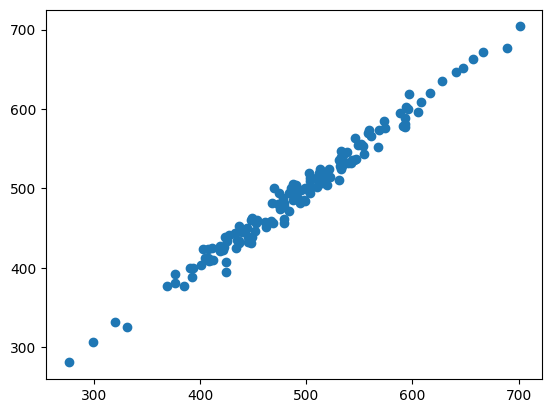

In [26]:
# CODE HERE
plt.scatter(y_test, pred)

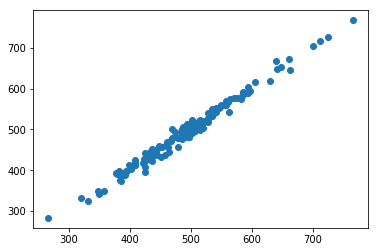

## Evaluating the Model
**sklearn 의 metircs 패키지를 import 한 후 패키지에서 제공되는 함수들로 R2 score, RMSE를 계산하세요.**

In [29]:
# CODE HERE
from sklearn.metrics import r2_score, mean_squared_error
print(f'R2 score : {r2_score(y_test, pred)}')
print(f'RMSE : {mean_squared_error(y_test, pred, squared=False)}')

R2 score : 0.9808757641125855
RMSE : 10.193897260863158


R2 score : 0.9808757641125855
RMSE : 10.193897260863158


## Conclusion

처음 문제로 돌아와서 모바일앱 또는 웹사이트 운영에 더 집중투자할지를 결정해야 합니다. 어쩌면 그보다 다른 요소들이 더 중요한지도 모릅니다. coefficient 를 살펴보면서 생각해봅시다.

**아래와 같이 coeffecient 에 대한 DataFrame 을 만드세요.**

In [32]:
# CODE HERE
pd.DataFrame(model.coef_, index=X.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


,Coeffecient
Avg. Session Length,25.867657
Time on App,38.429677
Time on Website,0.604998
Length of Membership,61.285737


**이러한 계수를 어떻게 해석할 수 있습니까?**

In [ ]:
# 고객이 앱 사용시간이 1분 증가함에 따라 연간구매금액은 약 38달러 상승함

**이 회사가 모바일앱 또는 웹사이트 운영에 집중투자해야한다고 생각하세요? 추가적으로 취해야 할 비즈니스 액션은 무엇인가요?**

In [ ]:
# 모바일에 집중 투자가 필요하다. 모바일에서 멤버쉽 유지를 위한 프로모션 진행